<a href="https://colab.research.google.com/github/seryeongi/exec_machinlearning/blob/master/ml5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/goms_feature_prep.csv')

In [ ]:
data.head()

,jobseekAftGradu,jobseekAftGradu_str,workWithin1yr,workWithin1yr_str,wishWorkHr,wishSalary,JobYNaftGradu,JobYNaftGradu_str,wayTolivexpense,wayTolivexpense_str,schoolType,schoolType_str,majorType,majorType_str,majorCate,majorCate_str,major,major_str,age,internExp,toeicScore,tospGrade,trainingHr,jobseekYN,certNum,mainJobCate,mainJobCate_str,midJobCate,midJobCate_str,subJobCate,subJobCate_str
0,2,아니오,2,아니오,0,0,2,아니오,1,일자리에서의 근로 소득,1,2~3년제,1,인문,1,일본어,1,비즈니스일본어과,23,0,0,0,0,1,0,6,미용·여행·숙박·음식·경비·청소직,20,경호·경비직,541,경호·보안 종사자
1,1,예,2,아니오,3,2400,2,아니오,-1,모름/무응답,1,2~3년제,1,인문,1,일본어,2,일본어과,21,0,0,0,240,1,0,0,무직,0,무직,0,무직
2,2,아니오,2,아니오,0,0,2,아니오,3,가족 친지로부터의 지원,1,2~3년제,1,인문,1,일본어,2,일본어과,21,0,800,0,0,0,1,3,교육·법률·사회복지·경찰·소방직 및 군인,9,교육직,214,문리·기술·예능 강사
3,2,아니오,2,아니오,0,0,2,아니오,1,일자리에서의 근로 소득,1,2~3년제,1,인문,1,일본어,3,관광일어과,25,0,0,0,0,0,0,6,미용·여행·숙박·음식·경비·청소직,18,여행·숙박·오락 서비스직,522,항공기·선박·열차 객실승무원
4,2,아니오,2,아니오,0,0,2,아니오,1,일자리에서의 근로 소득,1,2~3년제,1,인문,1,일본어,3,관광일어과,21,0,0,0,0,1,1,7,영업·판매·운전·운송직,23,영업·판매직,615,판매 종사자


majorcate, mainJobCate 사용  


In [ ]:
data.isnull().sum()

jobseekAftGradu        0
jobseekAftGradu_str    0
workWithin1yr          0
workWithin1yr_str      0
wishWorkHr             0
wishSalary             0
JobYNaftGradu          0
JobYNaftGradu_str      0
wayTolivexpense        0
wayTolivexpense_str    0
schoolType             0
schoolType_str         0
majorType              0
majorType_str          0
majorCate              0
majorCate_str          0
major                  0
major_str              0
age                    0
internExp              0
toeicScore             0
tospGrade              0
trainingHr             0
jobseekYN              0
certNum                0
mainJobCate            0
mainJobCate_str        0
midJobCate             0
midJobCate_str         0
subJobCate             0
subJobCate_str         0
dtype: int64

In [ ]:
data1 = data.drop(['jobseekAftGradu_str','workWithin1yr_str','JobYNaftGradu_str','wayTolivexpense_str','schoolType_str','majorType','majorType_str','majorCate_str','major','major_str','mainJobCate_str','midJobCate','midJobCate_str','subJobCate','subJobCate_str'],axis=1)

In [ ]:
data1.head()

,jobseekAftGradu,workWithin1yr,wishWorkHr,wishSalary,JobYNaftGradu,wayTolivexpense,schoolType,majorCate,age,internExp,toeicScore,tospGrade,trainingHr,jobseekYN,certNum,mainJobCate
0,2,2,0,0,2,1,1,1,23,0,0,0,0,1,0,6
1,1,2,3,2400,2,-1,1,1,21,0,0,0,240,1,0,0
2,2,2,0,0,2,3,1,1,21,0,800,0,0,0,1,3
3,2,2,0,0,2,1,1,1,25,0,0,0,0,0,0,6
4,2,2,0,0,2,1,1,1,21,0,0,0,0,1,1,7


In [ ]:
data1.corr()

,jobseekAftGradu,workWithin1yr,wishWorkHr,wishSalary,JobYNaftGradu,wayTolivexpense,schoolType,majorCate,age,internExp,toeicScore,tospGrade,jobseekYN,certNum,mainJobCate
jobseekAftGradu,1.000000,0.590611,-0.557803,-0.492292,0.206761,0.413069,-0.000098,0.020261,0.039478,0.078706,-0.018634,-0.003876,-0.047801,-0.017914,0.264452
workWithin1yr,0.590611,1.000000,-0.849883,-0.770728,0.174078,0.604614,-0.003497,0.020851,0.050639,0.115203,-0.001360,0.000287,-0.001145,0.015523,0.387083
wishWorkHr,-0.557803,-0.849883,1.000000,0.913073,-0.152998,-0.671703,0.000486,-0.012744,-0.054655,-0.127987,0.013012,-0.012815,-0.040206,-0.044043,-0.430034
wishSalary,-0.492292,-0.770728,0.913073,1.000000,-0.128918,-0.645559,0.023434,0.016316,-0.049686,-0.123005,0.037945,-0.002782,-0.037623,-0.056088,-0.413296
JobYNaftGradu,0.206761,0.174078,-0.152998,-0.128918,1.000000,0.250469,0.040393,0.062718,0.081708,0.085138,-0.000162,-0.007591,-0.073747,-0.051886,0.112625
wayTolivexpense,0.413069,0.604614,-0.671703,-0.645559,0.250469,1.000000,0.008934,0.021771,0.032834,0.139624,-0.029013,-0.013595,-0.024512,0.011225,0.525301
schoolType,-0.000098,-0.003497,0.000486,0.023434,0.040393,0.008934,1.000000,0.663965,0.016855,0.013671,0.227947,0.099793,0.088792,-0.067994,-0.155942
majorCate,0.020261,0.020851,-0.012744,0.016316,0.062718,0.021771,0.663965,1.000000,0.002800,0.013992,0.195381,0.085253,0.056325,-0.064330,-0.109489
age,0.039478,0.050639,-0.054655,-0.049686,0.081708,0.032834,0.016855,0.002800,1.000000,-0.018509,-0.031131,-0.004366,-0.086278,0.024569,0.045411
internExp,0.078706,0.115203,-0.127987,-0.123005,0.085138,0.139624,0.013671,0.013992,-0.018509,1.000000,0.051621,0.033603,0.060472,-0.006254,0.085887


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

from xgboost import XGBRegressor
from xgboost import plot_importance

In [ ]:
y_main = data1['mainJobCate']
x_main = data1.drop(['mainJobCate'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(x_main, y_main, test_size=0.3, random_state=0)
dtr = DecisionTreeRegressor(max_depth=3, random_state=12)
dtr.fit(X_train, y_train)

rfr = RandomForestRegressor(max_depth = 3,random_state=12)
rfr.fit(X_train, y_train)

xgbr = XGBRegressor(objective='reg:squarederror', max_depth=3, random_state=12)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=12, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
y_train_pred = dtr.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)

y_test_pred = dtr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

Train MSE: 4.1280
Test MSE: 4.2456


In [ ]:
y_train_pred = rfr.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)

y_test_pred = rfr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

y_train_pred = rfr.predict(X_train)

Train MSE: 4.0966
Test MSE: 4.2200


In [ ]:
y_train_pred = xgbr.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)

y_test_pred = xgbr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)


Train MSE: 3.8090
Test MSE: 4.0036


mid

In [ ]:
data2 = data.drop(['jobseekAftGradu_str','workWithin1yr_str','JobYNaftGradu_str','wayTolivexpense_str','schoolType_str','majorType','majorType_str','majorCate_str','major','major_str','mainJobCate_str','mainJobCate','midJobCate_str','subJobCate','subJobCate_str'],axis=1)

In [ ]:
data2.columns

Index(['jobseekAftGradu', 'workWithin1yr', 'wishWorkHr', 'wishSalary',
       'JobYNaftGradu', 'wayTolivexpense', 'schoolType', 'majorCate', 'age',
       'internExp', 'toeicScore', 'tospGrade', 'trainingHr', 'jobseekYN',
       'certNum', 'midJobCate'],
      dtype='object')

In [ ]:
y_main = data2['midJobCate']
x_main = data2.drop(['midJobCate'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(x_main, y_main, test_size=0.3, random_state=0)
dtr = DecisionTreeRegressor(max_depth=3, random_state=12)
dtr.fit(X_train, y_train)

rfr = RandomForestRegressor(max_depth = 3,random_state=12)
rfr.fit(X_train, y_train)

xgbr = XGBRegressor(objective='reg:squarederror', max_depth=3, random_state=12)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=12, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
y_train_pred = dtr.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)

y_test_pred = dtr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

Train MSE: 45.6006
Test MSE: 46.5201


In [ ]:
y_train_pred = rfr.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)

y_test_pred = rfr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

y_train_pred = rfr.predict(X_train)

Train MSE: 45.1510
Test MSE: 46.0387


In [ ]:
y_train_pred = xgbr.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)

y_test_pred = xgbr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

Train MSE: 42.1157
Test MSE: 43.8149


In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lgbm_reg = LGBMRegressor( max_depth=3, random_state=12)
lgbm_reg.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=3,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=12, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_train_pred = lgbm_clf.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)

y_test_pred = lgbm_clf.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

Train MSE: 42.2738
Test MSE: 43.7043


subjobcate

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/goms_feature_prep_com.csv')

In [ ]:
data.head()

,jobseekAftGradu,jobseekAftGradu_str,workWithin1yr,workWithin1yr_str,wishWorkHr,wishSalary,JobYNaftGradu,JobYNaftGradu_str,wayTolivexpense,wayTolivexpense_str,schoolType,schoolType_str,majorCate,majorCate_str,age,internExp,toeicScore,tospGrade,trainingHr,jobseekYN,certNum,mainJobCate,mainJobCate_str,midJobCate,midJobCate_str,subJobCate,subJobCate_str,jobYN_str,jobYN
0,2,아니오,2,아니오,0,0,2,아니오,1,일자리에서의 근로 소득,1,2~3년제,1,일본어,23,0,0,0,0,1,0,6,미용·여행·숙박·음식·경비·청소직,20,경호·경비직,73,경호·보안종사자,근로자,1
1,1,예,2,아니오,3,2400,2,아니오,-1,모름/무응답,1,2~3년제,1,일본어,21,0,0,0,240,1,0,0,무직,0,무직,0,무직,무직자,0
2,2,아니오,2,아니오,0,0,2,아니오,3,가족 친지로부터의 지원,1,2~3년제,1,일본어,21,0,800,0,0,0,1,3,교육·법률·사회복지·경찰·소방직및군인,9,교육직,41,문리·기술·예능강사,근로자,1
3,2,아니오,2,아니오,0,0,2,아니오,1,일자리에서의 근로 소득,1,2~3년제,1,일본어,25,0,0,0,0,0,0,6,미용·여행·숙박·음식·경비·청소직,18,여행·숙박·오락 서비스직,68,항공기·선박·열차객실승무원,근로자,1
4,2,아니오,2,아니오,0,0,2,아니오,1,일자리에서의 근로 소득,1,2~3년제,1,일본어,21,0,0,0,0,1,1,7,영업·판매·운전·운송직,23,영업·판매직,82,판매종사자,근로자,1


In [ ]:
data3 = data.drop(['jobseekAftGradu_str','workWithin1yr_str','JobYNaftGradu_str','wayTolivexpense_str','schoolType_str','majorCate_str','mainJobCate_str','mainJobCate','midJobCate_str','midJobCate','subJobCate_str','jobYN_str','jobYN'],axis=1)

In [ ]:
data3.head()

,jobseekAftGradu,workWithin1yr,wishWorkHr,wishSalary,JobYNaftGradu,wayTolivexpense,schoolType,majorCate,age,internExp,toeicScore,tospGrade,trainingHr,jobseekYN,certNum,subJobCate
0,2,2,0,0,2,1,1,1,23,0,0,0,0,1,0,73
1,1,2,3,2400,2,-1,1,1,21,0,0,0,240,1,0,0
2,2,2,0,0,2,3,1,1,21,0,800,0,0,0,1,41
3,2,2,0,0,2,1,1,1,25,0,0,0,0,0,0,68
4,2,2,0,0,2,1,1,1,21,0,0,0,0,1,1,82


In [ ]:
data3.corr()

,jobseekAftGradu,workWithin1yr,wishWorkHr,wishSalary,JobYNaftGradu,wayTolivexpense,schoolType,majorCate,age,internExp,toeicScore,tospGrade,trainingHr,jobseekYN,certNum,subJobCate
jobseekAftGradu,1.000000,0.590611,-0.557803,-0.492292,0.206761,0.413069,-0.000098,0.020261,3.947804e-02,0.078706,-0.018634,-0.003876,-7.777381e-03,-0.047801,-0.017914,0.277004
workWithin1yr,0.590611,1.000000,-0.849883,-0.770728,0.174078,0.604614,-0.003497,0.020851,5.063924e-02,0.115203,-0.001360,0.000287,-3.675813e-03,-0.001145,0.015523,0.405454
wishWorkHr,-0.557803,-0.849883,1.000000,0.913073,-0.152998,-0.671703,0.000486,-0.012744,-5.465498e-02,-0.127987,0.013012,-0.012815,-9.689973e-03,-0.040206,-0.044043,-0.450444
wishSalary,-0.492292,-0.770728,0.913073,1.000000,-0.128918,-0.645559,0.023434,0.016316,-4.968564e-02,-0.123005,0.037945,-0.002782,-1.351825e-02,-0.037623,-0.056088,-0.432911
JobYNaftGradu,0.206761,0.174078,-0.152998,-0.128918,1.000000,0.250469,0.040393,0.062718,8.170759e-02,0.085138,-0.000162,-0.007591,5.807324e-03,-0.073747,-0.051886,0.125040
wayTolivexpense,0.413069,0.604614,-0.671703,-0.645559,0.250469,1.000000,0.008934,0.021771,3.283368e-02,0.139624,-0.029013,-0.013595,-2.350351e-03,-0.024512,0.011225,0.550590
schoolType,-0.000098,-0.003497,0.000486,0.023434,0.040393,0.008934,1.000000,0.663965,1.685533e-02,0.013671,0.227947,0.099793,2.674742e-02,0.088792,-0.067994,-0.155924
majorCate,0.020261,0.020851,-0.012744,0.016316,0.062718,0.021771,0.663965,1.000000,2.799559e-03,0.013992,0.195381,0.085253,2.943673e-02,0.056325,-0.064330,-0.107178
age,0.039478,0.050639,-0.054655,-0.049686,0.081708,0.032834,0.016855,0.002800,1.000000e+00,-0.018509,-0.031131,-0.004366,5.021414e-07,-0.086278,0.024569,0.048944
internExp,0.078706,0.115203,-0.127987,-0.123005,0.085138,0.139624,0.013671,0.013992,-1.850914e-02,1.000000,0.051621,0.033603,1.371924e-02,0.060472,-0.006254,0.083456


In [ ]:
y_main = data3['subJobCate']
x_main = data3.drop(['subJobCate'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(x_main, y_main, test_size=0.3, random_state=0)
dtr = DecisionTreeRegressor(max_depth=3, random_state=12)
dtr.fit(X_train, y_train)

rfr = RandomForestRegressor(max_depth = 3,random_state=12)
rfr.fit(X_train, y_train)

xgbr = XGBRegressor(objective='reg:squarederror', max_depth=3, random_state=12)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=12, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
y_train_pred = dtr.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)

y_test_pred = dtr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

Train MSE: 570.6813
Test MSE: 582.6663


In [ ]:
y_train_pred = rfr.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)

y_test_pred = rfr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

y_train_pred = rfr.predict(X_train)

Train MSE: 565.4750
Test MSE: 577.6326


In [ ]:
y_train_pred = xgbr.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)

y_test_pred = xgbr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

Train MSE: 524.2288
Test MSE: 548.8263


In [ ]:
lgbm_reg = LGBMRegressor( max_depth=3, random_state=12)
lgbm_reg.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=3,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=12, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_train_pred = lgbm_reg.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)

y_test_pred = lgbm_reg.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

Train MSE: 523.7102
Test MSE: 547.4951


pickle 저장 - 최종본

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/goms_feature_prep_com.csv')

In [ ]:
data.head()

,jobsearch,yrwish,wishhr,wishsalary,jobgradu,liveexp,schooltype,majorcate,age,intern,toeic,tosp,train,jobseek,cert,subJobCate
0,2,2,0,0,2,1,1,1,23,0,0,0,0,1,0,73
1,1,2,3,2400,2,-1,1,1,21,0,0,0,240,1,0,0
2,2,2,0,0,2,3,1,1,21,0,800,0,0,0,1,41
3,2,2,0,0,2,1,1,1,25,0,0,0,0,0,0,68
4,2,2,0,0,2,1,1,1,21,0,0,0,0,1,1,82


In [ ]:
y_main = data['subJobCate']
x_main = data.drop(['subJobCate'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(x_main, y_main, test_size=0.3, random_state=0)
dtr = DecisionTreeRegressor(max_depth=3, random_state=12)
dtr.fit(X_train, y_train)

rfr = RandomForestRegressor(max_depth = 3,random_state=12)
rfr.fit(X_train, y_train)

xgbr = XGBRegressor(objective='reg:squarederror', max_depth=3, random_state=12)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=12, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
y_train_pred = dtr.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)

y_test_pred = dtr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

Train MSE: 570.6813
Test MSE: 582.6663


In [ ]:
y_train_pred = rfr.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)

y_test_pred = rfr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

y_train_pred = rfr.predict(X_train)

Train MSE: 565.4750
Test MSE: 577.6326


In [ ]:
y_train_pred = xgbr.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)

y_test_pred = xgbr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

Train MSE: 524.2288
Test MSE: 548.8263


In [ ]:
lgbm_reg = LGBMRegressor( max_depth=3, random_state=12)
lgbm_reg.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=3,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=12, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_train_pred = lgbm_reg.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)

y_test_pred = lgbm_reg.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

Train MSE: 523.7102
Test MSE: 547.4951


In [ ]:
import pickle

In [ ]:
from sklearn.externals import joblib
 
# save model
joblib.dump(lgbm_reg, 'lgb.pkl')
 

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['lgb.pkl']

In [ ]:
# load model
load_model = joblib.load('lgb.pkl')

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/goms_feature_prep_com.csv')

y_main = data['subJobCate']
x_main = data.drop(['subJobCate'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(x_main, y_main, test_size=0.3, random_state=0)
lgbm_clf = LGBMClassifier( max_depth=3, random_state=12)
lgbm_clf.fit(X_train, y_train)
y_train_pred = lgbm_clf.predict(X_train)
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.08628283781658015

In [ ]:
# save model
joblib.dump(lgbm_clf, 'lgb_clf.pkl')

['lgb_clf.pkl']

In [ ]:
# load model
load_model = joblib.load('lgb.pkl')
# result = load_model.predict(pd.DataFrame())

mid

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/goms_feature_prep_com_mid.csv')

In [ ]:
data.head()

,jobsearch,yrwish,wishhr,wishsalary,jobgradu,liveexp,schooltype,majorcate,age,intern,toeic,tosp,train,jobseek,cert,midJobCate
0,2,2,0,0,2,1,1,1,23,0,0,0,0,1,0,20
1,1,2,3,2400,2,-1,1,1,21,0,0,0,240,1,0,0
2,2,2,0,0,2,3,1,1,21,0,800,0,0,0,1,9
3,2,2,0,0,2,1,1,1,25,0,0,0,0,0,0,18
4,2,2,0,0,2,1,1,1,21,0,0,0,0,1,1,23


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y_main = data['midJobCate']
x_main = data.drop(['midJobCate'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(x_main, y_main, test_size=0.3, random_state=0)

lgbm_clf = LGBMClassifier( max_depth=3, random_state=12)
lgbm_clf.fit(X_train, y_train)
y_train_pred = lgbm_clf.predict(X_train)
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)
y_test_pred = lgbm_clf.predict(X_test)

accuracy_score(y_test,y_test_pred)


0.6146081849880712

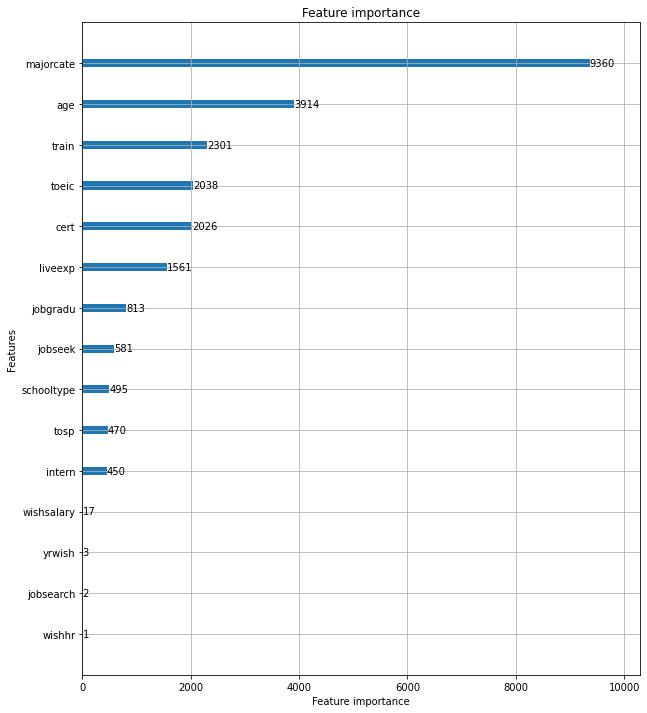

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_clf, ax=ax)

In [ ]:
from sklearn.externals import joblib
# save model
joblib.dump(lgbm_clf, 'lgb_clf_mid.pkl')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['lgb_clf_mid.pkl']